In [13]:
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

from modules import calib

In [14]:
# IN_DIR = "/media/takuya/exHDD/M1/result/2022_02_08/post/gx_32_gy_32_t_32_s_64_th_70/"
# OUT_DIR = "/media/takuya/exHDD/M1/result/2022_02_08/graph/gx_32_gy_32_t_32_s_64_th_70/"
IN_DIR = "F:\\M1\\result\\2022_02_08\\post\\gx_32_gy_32_t_32_s_64_th_70\\"
OUT_DIR = "F:\\M1\\result\\2022_02_08\\graph\\gx_32_gy_32_t_32_s_64_th_70\\"

In [27]:
def graph(dx, dy, out_path):
    width, height = 739, 693
    n = 32

    x, y = np.meshgrid(np.linspace(693, -46, n, dtype="int"), np.linspace(0, height, n, dtype="int"))
    x = calib.px2mm(x)
    y = calib.px2mm(y)

    fig, ax = plt.subplots(facecolor="#333333", figsize=(36, 30))

    ax.set_facecolor('#ffffff')
    ax.spines['top'].set_color('#ffffff')
    ax.spines['bottom'].set_color('#ffffff')
    ax.spines['left'].set_color('#ffffff')
    ax.spines['right'].set_color('#ffffff')
    ax.tick_params(axis='x', colors='#ffffff')
    ax.tick_params(axis='y', colors='#ffffff')
    ax.xaxis.label.set_color('#ffffff')
    ax.yaxis.label.set_color('#ffffff')

    plt.xlabel("$r$ [mm]", fontsize=100)
    plt.ylabel("$z$ [mm]", fontsize=100)
    plt.xticks(fontsize=100)
    plt.yticks(fontsize=100)
    c = np.sqrt(dx ** 2 + dy ** 2)

    dx /= c
    dy /= c

    x = x[:, :-2]
    y = y[:, :-2]
    dx = dx[:, :-2]
    dy = dy[:, :-2]
    c = c[:, :-2]

    im = ax.quiver(x, y, -dx, dy, c, cmap="jet", scale_units='xy', scale=0.12, width=0.0045)

    pp = fig.colorbar(im)
    for tt in pp.ax.get_yticklabels():
        tt.set_fontsize(100)
    pp.set_label('$\sqrt{u^2+v^2}$ [mm/s]', fontsize=100, color='#ffffff')
    pp.ax.yaxis.set_tick_params(color='#ffffff')
    plt.setp(plt.getp(pp.ax.axes, 'yticklabels'), color='#ffffff')
    pp.outline.set_edgecolor('#ffffff')
    im.set_clim(0, 120)
    plt.show()
    fig.savefig('tmp.png', dpi=80)

    # plt.cla()
    # plt.clf()
    # plt.close()

  0%|          | 0/1 [00:00<?, ?it/s]

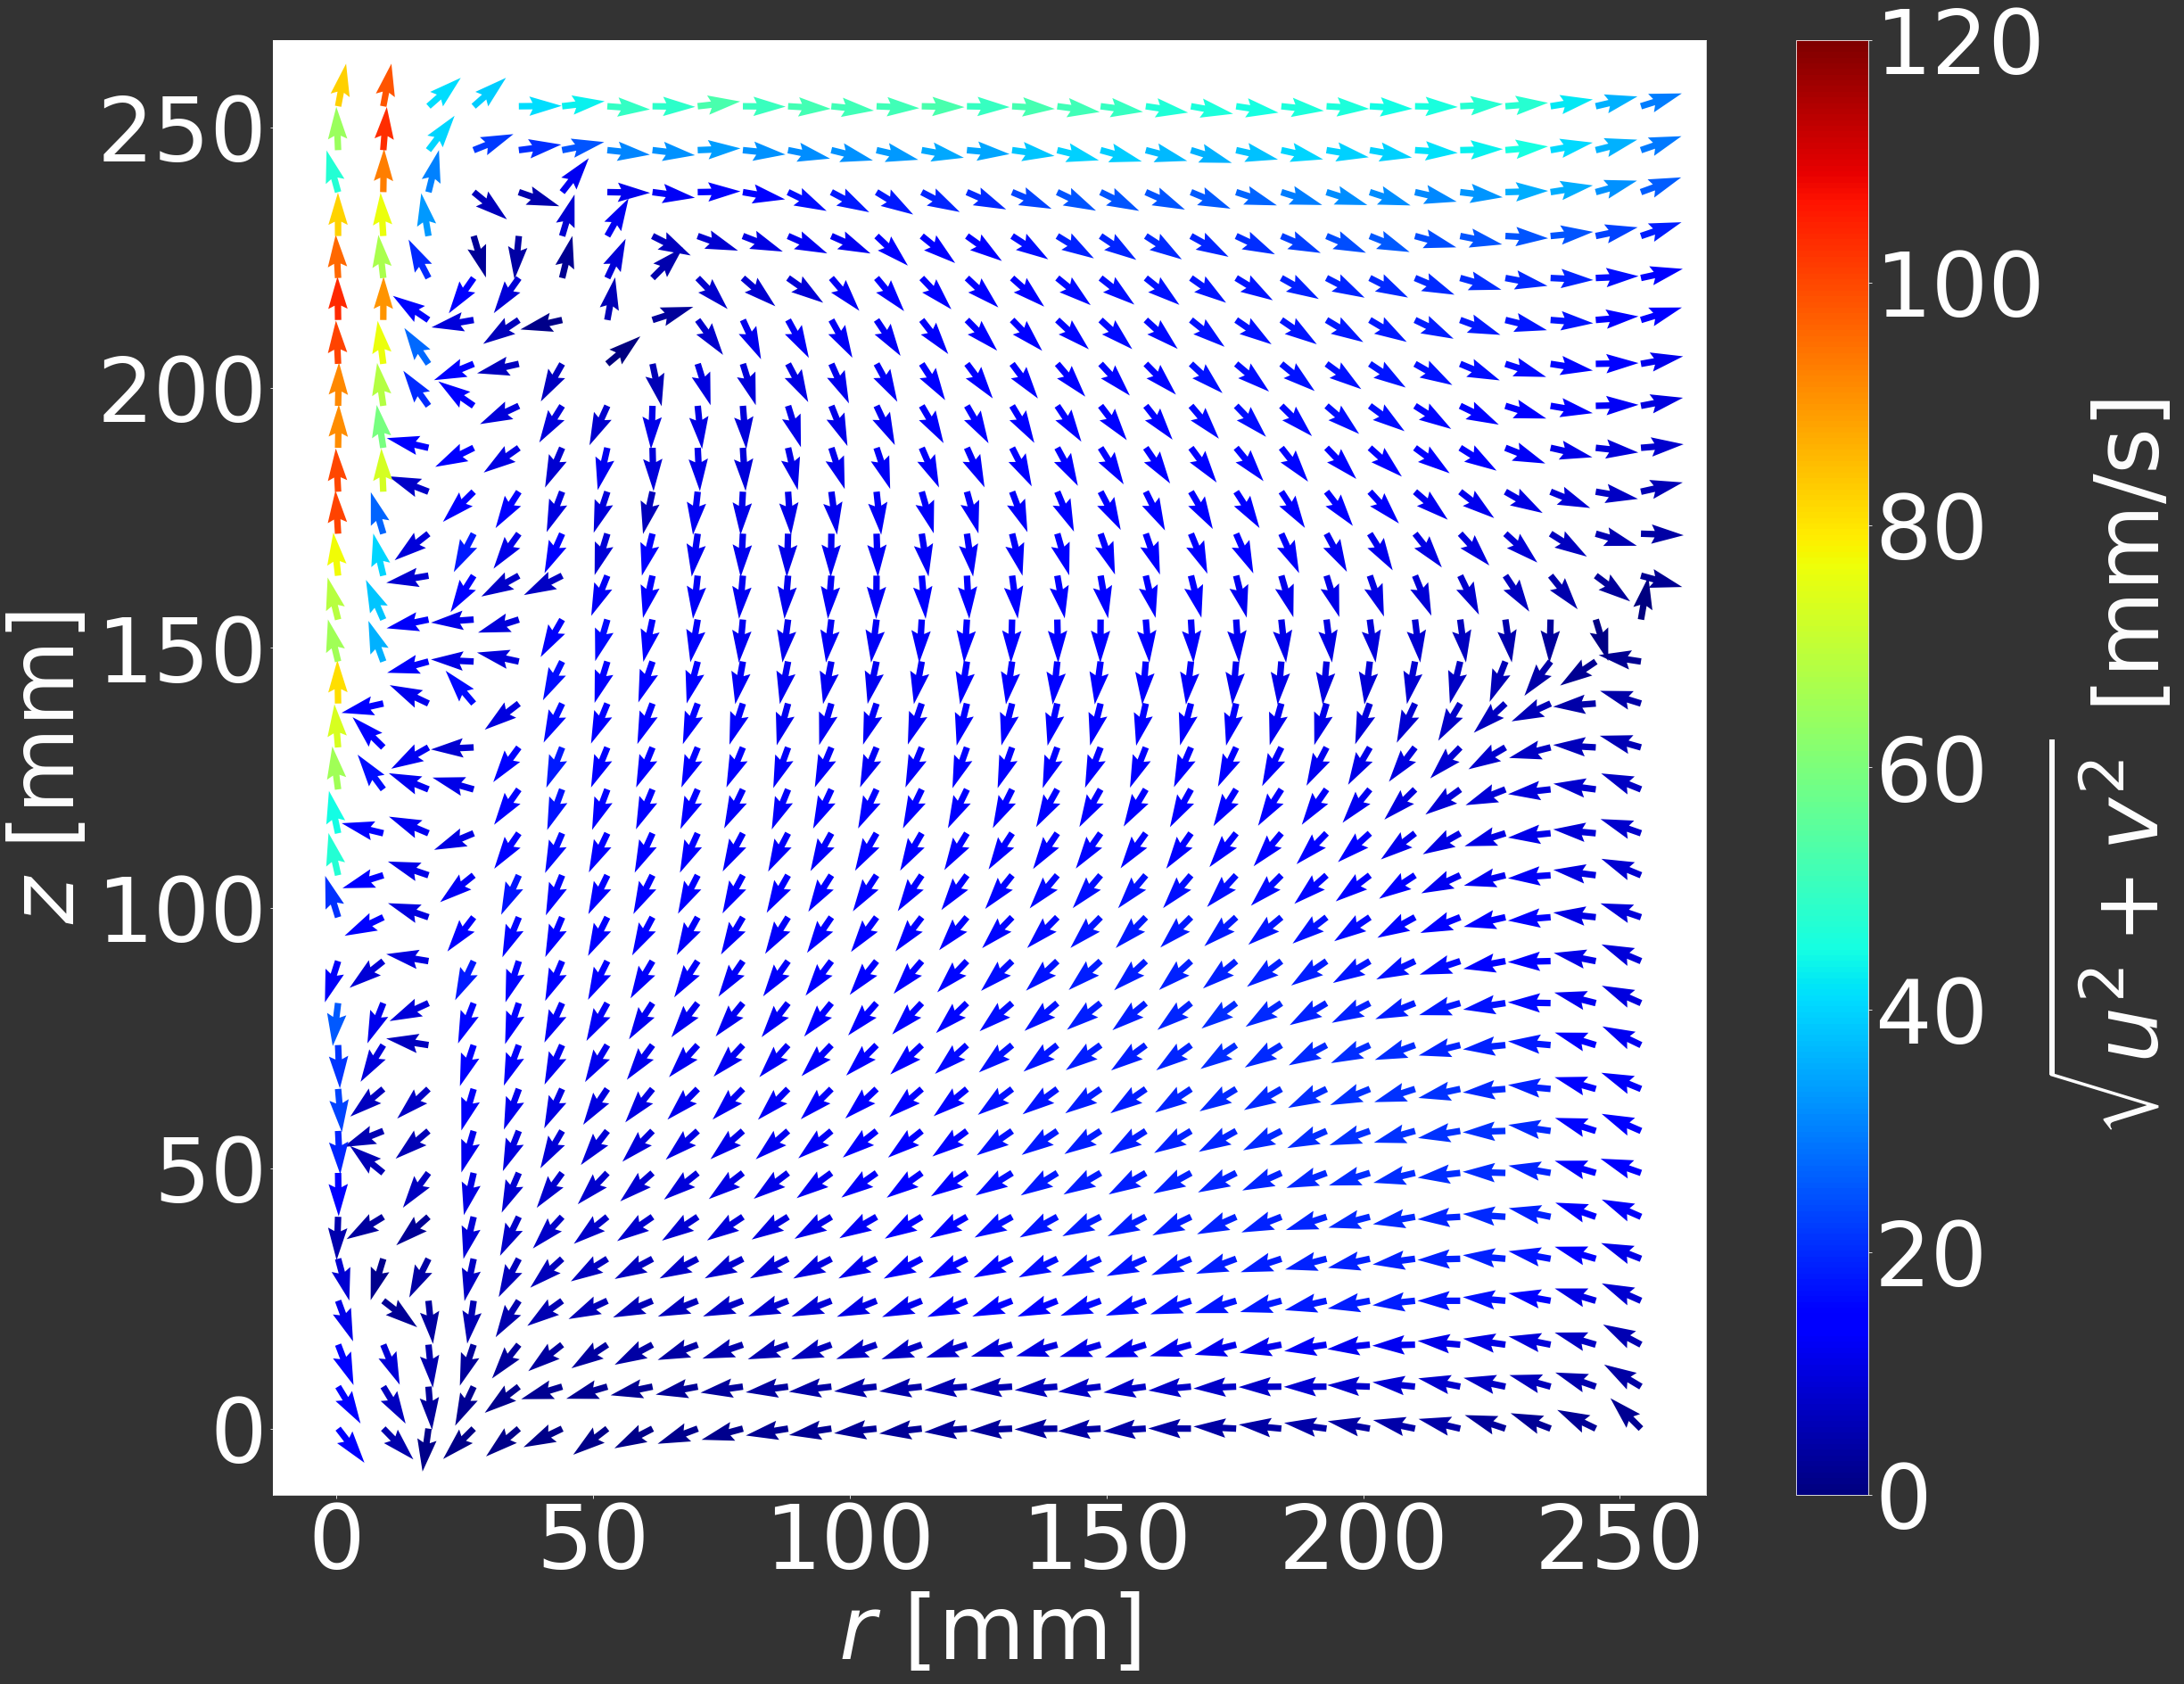

100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


In [28]:
for t in tqdm(range(500, 501, 500)):
    for q in range(1, 2):
        for i in range(0, 1):
            ave_dx = calib.f2s(calib.px2mm(np.loadtxt(IN_DIR + f"500_{t}/{q}/dx_{i}_{i+1}.csv", delimiter=',')))
            ave_dy = calib.f2s(calib.px2mm(np.loadtxt(IN_DIR + f"500_{t}/{q}/dy_{i}_{i+1}.csv", delimiter=',')))

            graph(dx=ave_dx, dy=ave_dy, out_path=OUT_DIR+f"500_{t}/{q}/dx_dy_{i}_{i+1}.png")